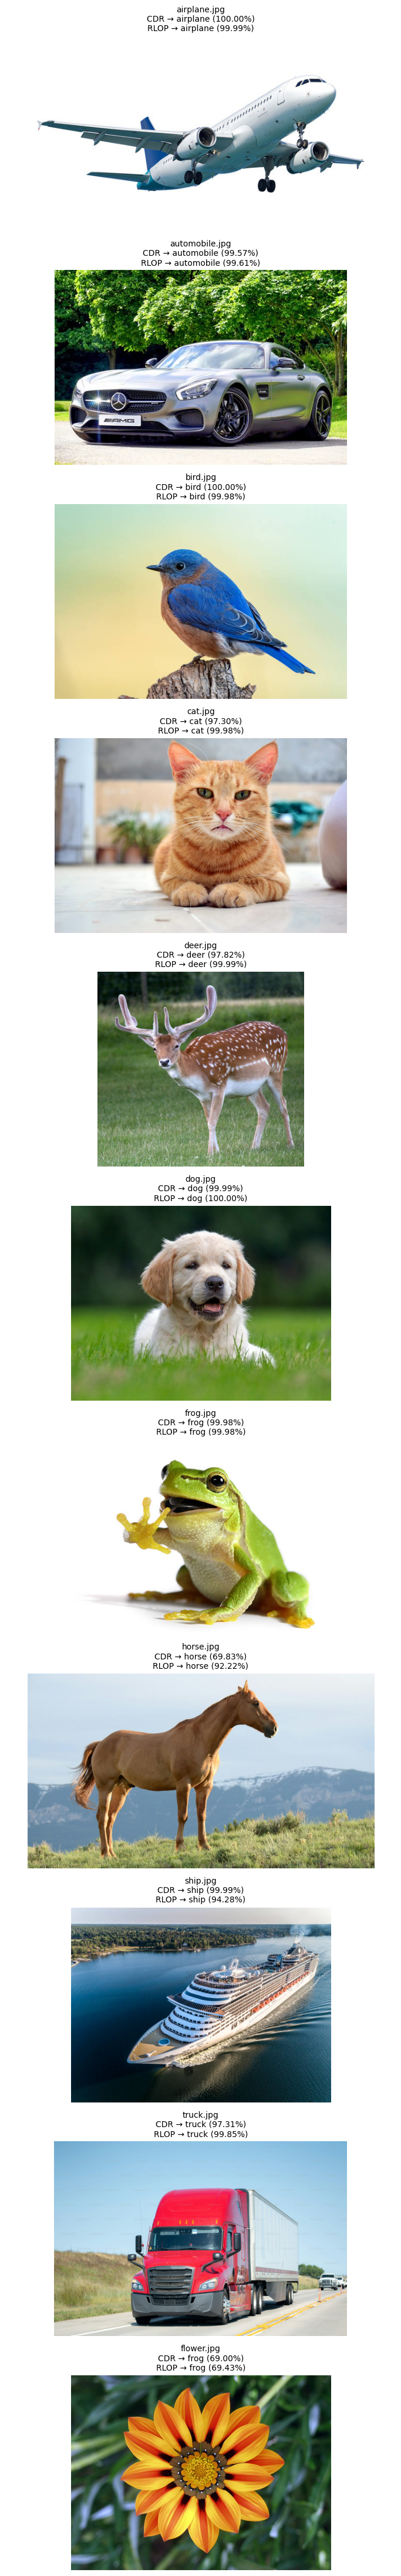

In [ ]:
import math
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load both models
model_cdr = tf.keras.models.load_model("best_resnet_CDR.h5")
model_rlop = tf.keras.models.load_model("best_resnet_RLOP.h5")

# CIFAR-10 class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# File names
filenames = [
    "airplane.jpg", "automobile.jpg", "bird.jpg", "cat.jpg", "deer.jpg",
    "dog.jpg", "frog.jpg", "horse.jpg", "ship.jpg", "truck.jpg", "flower.jpg"
]

# Image path
image_paths = [f"/images/{name}" for name in filenames]

# Prediction helper
def predict_image(model, img_path, target_size=(32, 32)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    preds = model.predict(img_array, verbose=0)
    pred_idx = np.argmax(preds)
    confidence = preds[0][pred_idx]
    return pred_idx, confidence

# Calculate grid size automatically
cols = 1
rows = math.ceil(len(image_paths) / cols)

plt.figure(figsize=(14, rows * 4))

# Predict and display
for i, img_path in enumerate(image_paths):
    cdr_idx, cdr_conf = predict_image(model_cdr, img_path)
    rlop_idx, rlop_conf = predict_image(model_rlop, img_path)

    img = image.load_img(img_path)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(
        f"{img_path}\n"
        f"CDR → {class_names[cdr_idx]} ({cdr_conf*100:.2f}%)\n"
        f"RLOP → {class_names[rlop_idx]} ({rlop_conf*100:.2f}%)",
        fontsize=10
    )

plt.tight_layout()
plt.show()
